In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/content/sample_data/bank-additional-full.csv',delimiter=';')
df.rename(columns={'y':'deposit'},inplace=True)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [8]:
df.dtypes.value_counts()

,count
object,11
int64,5
float64,5


In [9]:
df.duplicated().sum()

12

In [10]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [11]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


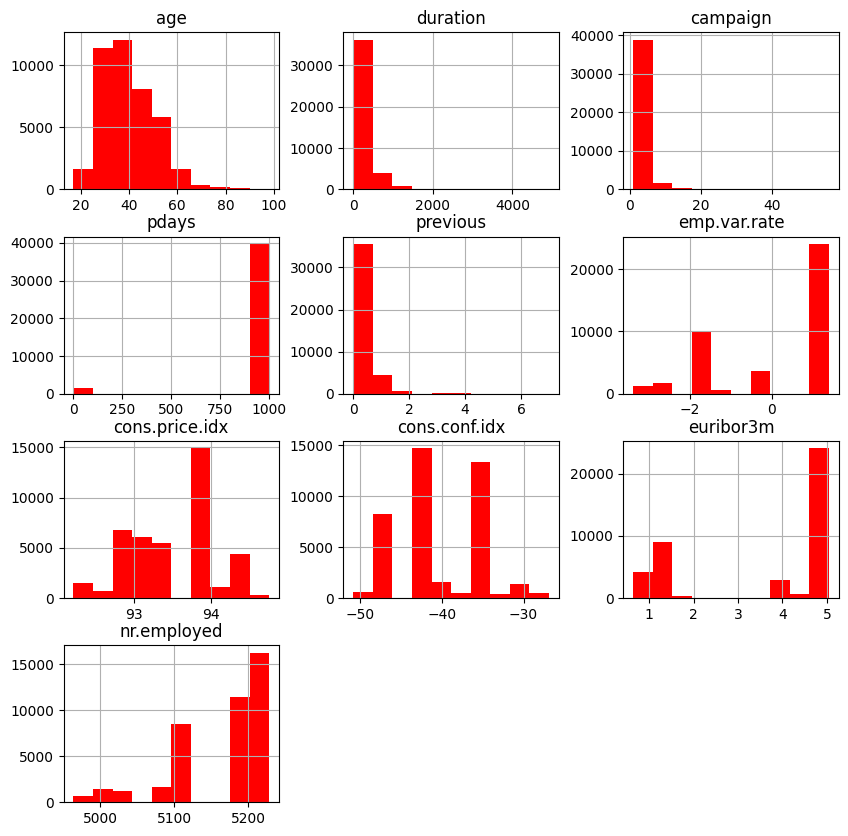

In [15]:
df.hist(figsize=(10,10), color='red')
plt.show()

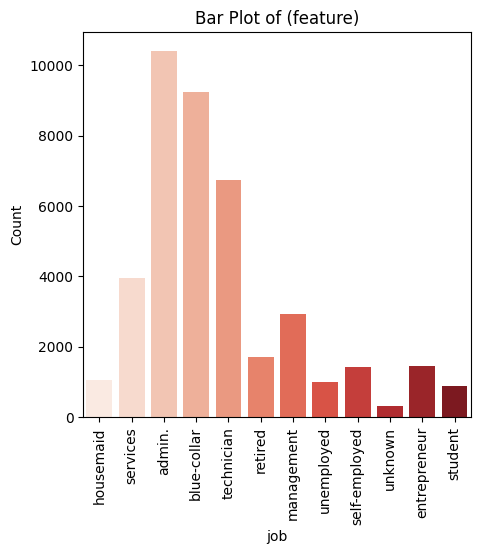

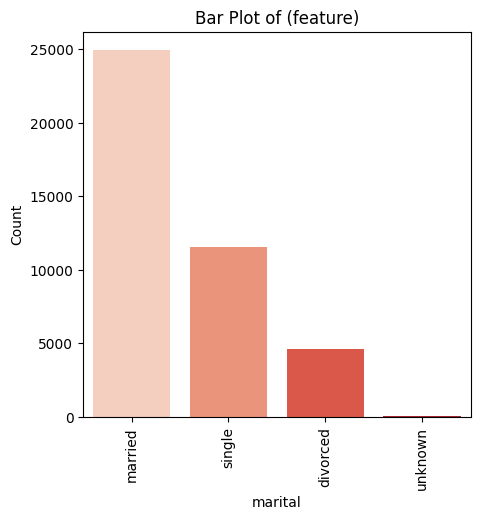

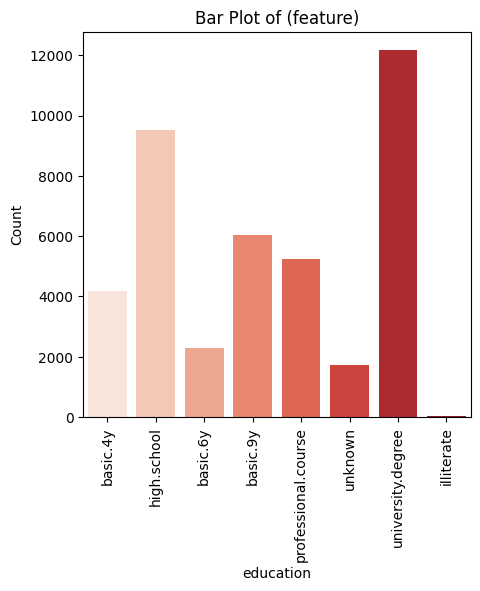

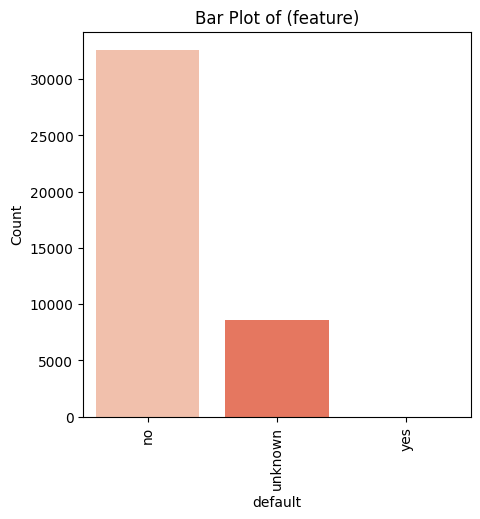

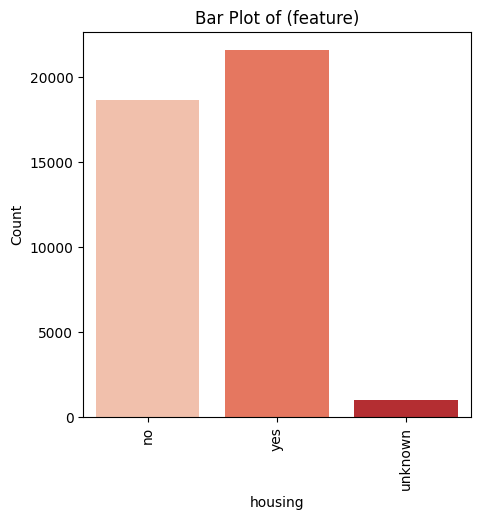

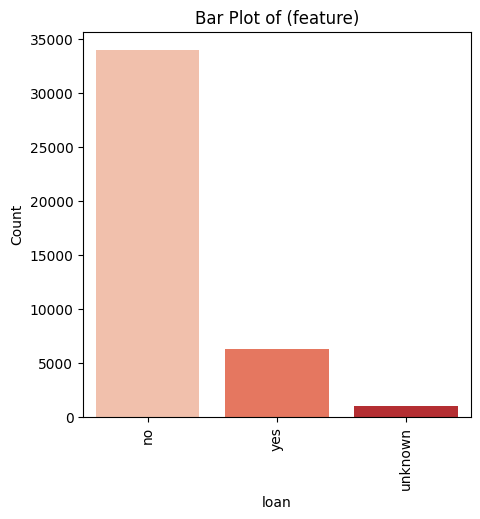

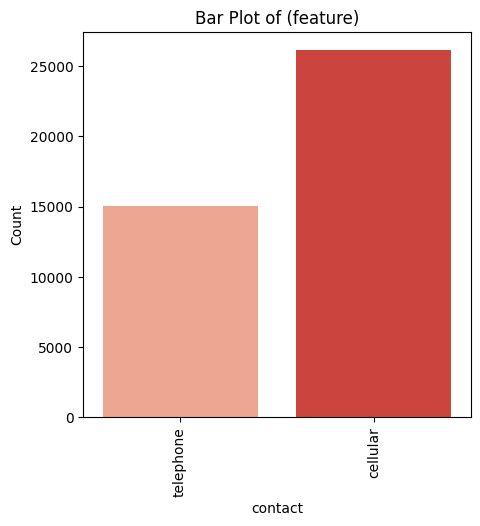

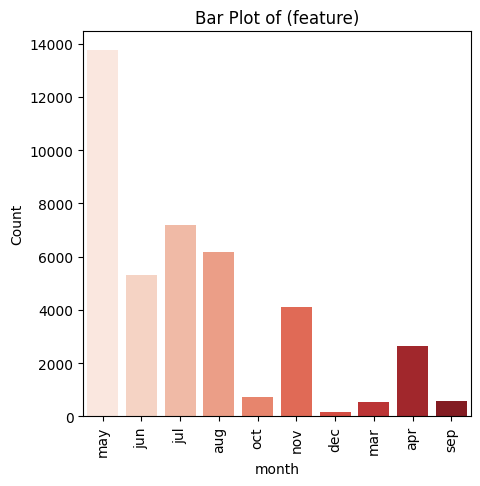

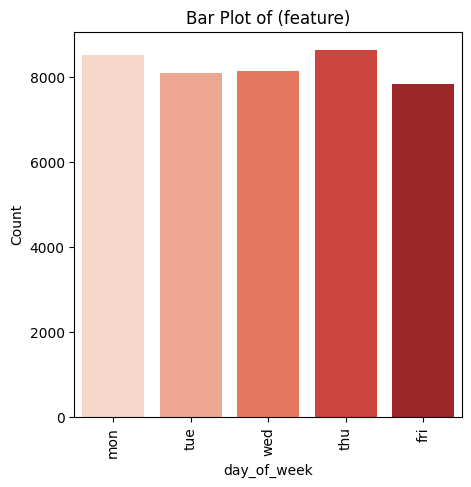

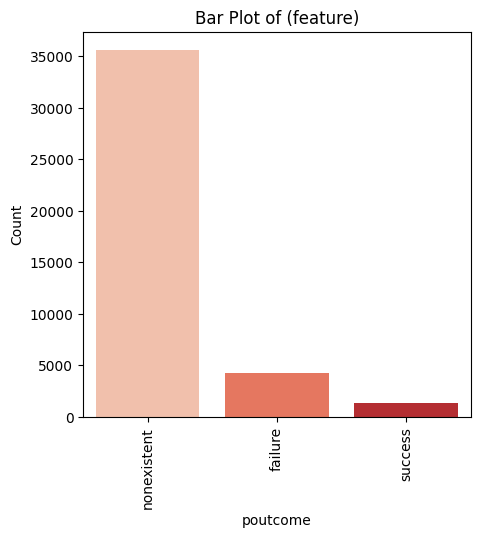

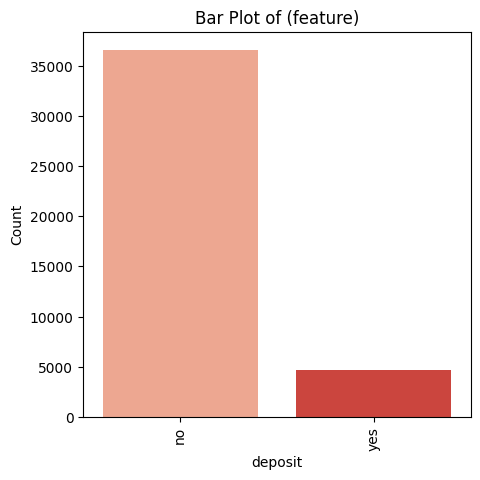

In [16]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature,data=df, palette='Reds')
    plt.title(f'Bar Plot of (feature)')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

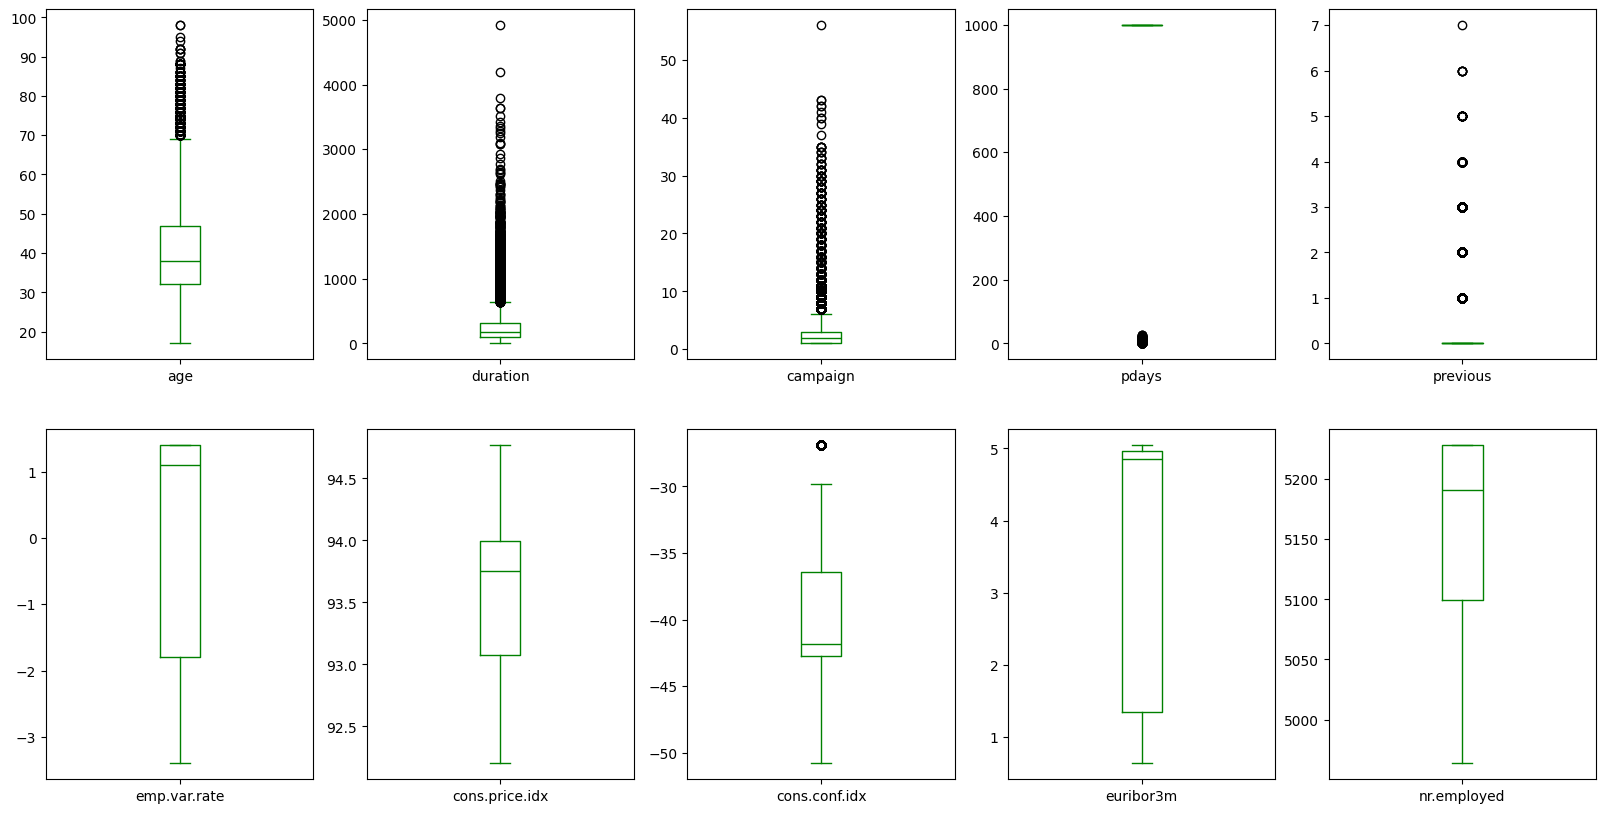

In [17]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10), color='green')
plt.show()

In [18]:
lb = LabelEncoder()
df1 = df.copy()
df_encoded = df1.apply(lb.fit_transform)
print(df_encoded)

       age  job  marital  education  default  housing  loan  contact  month  \
0       39    3        1          0        0        0     0        1      6   
1       40    7        1          3        1        0     0        1      6   
2       20    7        1          3        0        2     0        1      6   
3       23    0        1          1        0        0     0        1      6   
4       39    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   56    5        1          5        0        2     0        0      7   
41184   29    1        1          5        0        0     0        0      7   
41185   39    5        1          6        0        2     0        0      7   
41186   27    9        1          5        0        0     0        0      7   
41187   57    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous 

In [19]:
df_encoded['deposit'].value_counts()

,count
deposit,
0,36548
1,4640


In [20]:
x = df_encoded.drop('deposit',axis=1)
y = df_encoded['deposit']
print(x.shape)
print(y.shape)

(41188, 20)
(41188,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
print(41188*0.25)

10297.0


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 20)
(10297, 20)
(30891,)
(10297,)


In [24]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
['no', 'yes']
